### Norvig-style probabilistic model For Auto-Correct

In [4]:
import numpy as np
import pandas as pd

import re  #regex 
from collections import Counter  #Counter 

## OPEN THE FILE AND MAKE A DICTIONARY OF WORDS FROM IT 

In [6]:
def process(file_name):
    words = []
    
    with open(file_name) as f:
        file_name_data = f.read() #f.read(): This reads the entire content of the file into a single large string variable named file_name_data.
    file_name_data = file_name_data.lower()  #convert all the words read to lowercase
    words = re.findall('\w+' , file_name_data)
    
    return words

'\w+': This is the pattern.

\w matches any "word" character (letters, numbers, or underscores).

+means "one or more."

Essentially, this line ignores all punctuation and whitespace, extracting only the words.

In [11]:
words = process('shakespeare.txt')
vocab = set(words) #make a vocab consisitng of unique words only 
print(f"The first few words in the text are: \n{words[5:19]}")
print(f"There are {len(vocab)} unique words in the vocabulary.")

The first few words in the text are: 
['fire', 'that', 'would', 'ascend', 'the', 'brightest', 'heaven', 'of', 'invention', 'a', 'kingdom', 'for', 'a', 'stage']
There are 6116 unique words in the vocabulary.


NOW WE ARE GOING TO GET THE COUNT OF EACH WORD IN THE VOCAB FOR HOW MANY TIMES IT WAS USED

In [12]:
def count_words(words):
    word_count_dict = {}
    
    #we are going to make use of the Counter class
    word_count_dict = Counter(words)
    
    return word_count_dict

In [15]:
word_count_dict = count_words(words)

print(f"There are {len(word_count_dict)} key values pairs")  #we have pair of words , count 
print(f"The count for the word 'thee' is {word_count_dict.get('that',0)}")

There are 6116 key values pairs
The count for the word 'thee' is 785


NOW WE ARE GOING TO IMPLEMENT A FUNCTION WHICH FIND THE Proabability of each word in the Dictionary

In [23]:
def compute_probs(word_count_dict):
    
    probs = {}
    
    m = sum(word_count_dict.values())  #no of the total words
    
    for key in word_count_dict.keys():
        probs[key] = word_count_dict[key] / m
        
    return probs #return prob for each word from the dictionary given to us

In [26]:
probs = compute_probs(word_count_dict)
print(f"Length of probs is {len(probs)}")
print(f"P('the') is {probs['the']:.4f}")

Length of probs is 6116
P('the') is 0.0284


NOW FOR THE AUTOCORRECT TO WORK WE CAN HAVE THREE-FOUR TYPES OF OPERATIONS WE CAN IMEPLEMENT WITH US AND LIKE
+ delete_letter: given a word, it returns all the possible strings that have one character removed.
+ switch_letter: given a word, it returns all the possible strings that have two adjacent letters switched.
+ replace_letter: given a word, it returns all the possible strings that have one character replaced by another different letter.
+ insert_letter: given a word, it returns all the possible strings that have an additional character inserted.

In [79]:
def delete_letter(word , verbose = False):
    delete = []
    split = []
    
    for c in range(len(word)):
        s1 = word[:c]
        s2 = word[c:]
        
        #split made into s1 and s2
        split.append((s1 , s2))
        delete.append(s1+s2[1:]) #skip the idx at whic split was made as its deleted
        
    return delete
        

In [31]:
delete_word_l = delete_letter(word="orgasm",verbose=True)
delete_word_l

(['rgasm', 'ogasm', 'orasm', 'orgsm', 'orgam', 'orgas'],
 [('', 'orgasm'),
  ('o', 'rgasm'),
  ('or', 'gasm'),
  ('org', 'asm'),
  ('orga', 'sm'),
  ('orgas', 'm')])

In [78]:
def switch_letter(word , verbose = False):#switches two adjacent letter's
    switch = []
    split = []
    
    for c in range(len(word)):
        s1 = word[:c]
        s2 = word[c:]
        
        #split made into s1 and s2
        split.append((s1 , s2))
        
        # switch = [a + b[1] + b[0] + b[2:] for a,b in split if len(b) >= 2]
        if len(s2)>=2:
            switch.append(s1 + s2[1] + s2[0] + s2[2:])
    return switch

In [41]:
switch_word_l = switch_letter(word="home", verbose=True)
switch_word_l

(['ohme', 'hmoe', 'hoem'],
 [('', 'home'), ('h', 'ome'), ('ho', 'me'), ('hom', 'e')])

In [74]:
def replace_letter(word, verbose=False):
    letters = 'abcdefghijklmnopqrstuvwxyz'
    replace_l = []
    split_l = []

    for c in range(len(word)):
        s1 = word[:c]
        s2 = word[c:]
    # replace_l = [a + l + (b[1:] if len(b)> 1 else '') for a,b in split_l if b for l in letters]
        for l in letters:
            if l!=word[c]:
                replace_l.append(s1 + l + s2[1:])
    
    replace_set=set(replace_l)
    # replace_set.remove(word)
    
    replace_l = sorted(list(replace_set))
    
    return replace_l

In [75]:
replace_letter_l = replace_letter(word="home", verbose=True)
replace_letter_l

['aome',
 'bome',
 'come',
 'dome',
 'eome',
 'fome',
 'gome',
 'hame',
 'hbme',
 'hcme',
 'hdme',
 'heme',
 'hfme',
 'hgme',
 'hhme',
 'hime',
 'hjme',
 'hkme',
 'hlme',
 'hmme',
 'hnme',
 'hoae',
 'hobe',
 'hoce',
 'hode',
 'hoee',
 'hofe',
 'hoge',
 'hohe',
 'hoie',
 'hoje',
 'hoke',
 'hole',
 'homa',
 'homb',
 'homc',
 'homd',
 'homf',
 'homg',
 'homh',
 'homi',
 'homj',
 'homk',
 'homl',
 'homm',
 'homn',
 'homo',
 'homp',
 'homq',
 'homr',
 'homs',
 'homt',
 'homu',
 'homv',
 'homw',
 'homx',
 'homy',
 'homz',
 'hone',
 'hooe',
 'hope',
 'hoqe',
 'hore',
 'hose',
 'hote',
 'houe',
 'hove',
 'howe',
 'hoxe',
 'hoye',
 'hoze',
 'hpme',
 'hqme',
 'hrme',
 'hsme',
 'htme',
 'hume',
 'hvme',
 'hwme',
 'hxme',
 'hyme',
 'hzme',
 'iome',
 'jome',
 'kome',
 'lome',
 'mome',
 'nome',
 'oome',
 'pome',
 'qome',
 'rome',
 'some',
 'tome',
 'uome',
 'vome',
 'wome',
 'xome',
 'yome',
 'zome']

In [53]:
def insert_letter(word, verbose=False): 
    letters = 'abcdefghijklmnopqrstuvwxyz'
    insert_l = []
    split_l = []
    for c in range(len(word)+1):
        split_l.append((word[0:c],word[c:]))
    insert_l = [ a + l + b for a,b in split_l for l in letters]

    # if verbose: print(f"Input word {word} \nsplit_l = {split_l} \ninsert_l = {insert_l}")
    
    return insert_l

In [56]:
insert_l = insert_letter('fat', True)
print(f"Number of strings output by insert_letter('at') is {len(insert_l)}")
#insert_l

Number of strings output by insert_letter('at') is 104


Now that we have our base fucntions we can move on to the type of edits we want to like one letter edit or 2 letter edit whichever we want to implement

In [80]:
def edit_one_letter(word, allow_switches = True):    #we are keeping swtich_adj letters as optional if needed or not as its not a common used attribite
    edit_one_set = set()

    edit_one_set.update(delete_letter(word))
    if allow_switches:
        edit_one_set.update(switch_letter(word))
    edit_one_set.update(replace_letter(word))
    edit_one_set.update(insert_letter(word))

    return edit_one_set #set of unique words with one letter edits in them

In [81]:
tmp_word = "at"
tmp_edit_one_set = edit_one_letter(tmp_word) 
tmp_edit_one_l = sorted(list(tmp_edit_one_set)) # turn this into a list to sort it, in order to view it
print(f"input word {tmp_word} \nedit_one_l \n{tmp_edit_one_l}\n")
print(f"The type of the returned object should be a set {type(tmp_edit_one_set)}")
print(f"Number of outputs from edit_one_letter('at') is {len(edit_one_letter('at'))}")

input word at 
edit_one_l 
['a', 'aa', 'aat', 'ab', 'abt', 'ac', 'act', 'ad', 'adt', 'ae', 'aet', 'af', 'aft', 'ag', 'agt', 'ah', 'aht', 'ai', 'ait', 'aj', 'ajt', 'ak', 'akt', 'al', 'alt', 'am', 'amt', 'an', 'ant', 'ao', 'aot', 'ap', 'apt', 'aq', 'aqt', 'ar', 'art', 'as', 'ast', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz', 'au', 'aut', 'av', 'avt', 'aw', 'awt', 'ax', 'axt', 'ay', 'ayt', 'az', 'azt', 'bat', 'bt', 'cat', 'ct', 'dat', 'dt', 'eat', 'et', 'fat', 'ft', 'gat', 'gt', 'hat', 'ht', 'iat', 'it', 'jat', 'jt', 'kat', 'kt', 'lat', 'lt', 'mat', 'mt', 'nat', 'nt', 'oat', 'ot', 'pat', 'pt', 'qat', 'qt', 'rat', 'rt', 'sat', 'st', 't', 'ta', 'tat', 'tt', 'uat', 'ut', 'vat', 'vt', 'wat', 'wt', 'xat', 'xt', 'yat', 'yt', 'zat', 'zt']

The type of the returned object should be a set <class 'set'>
Number of outputs from edit_one_letter('at') is 129


In [82]:
def edit_two_letters(word, allow_switches = True):
    edit_two_set = set()
    
    edit_one = edit_one_letter(word,allow_switches=allow_switches)
    for w in edit_one:
        if w:
            edit_two = edit_one_letter(w,allow_switches=allow_switches)
            edit_two_set.update(edit_two)
            
    return edit_two_set #2 lvl's of edditing_of the string with us we have

In [83]:
tmp_edit_two_set = edit_two_letters("a")
tmp_edit_two_l = sorted(list(tmp_edit_two_set))
print(f"Number of strings with edit distance of two: {len(tmp_edit_two_l)}")
print(f"First 10 strings {tmp_edit_two_l[:10]}")
print(f"Last 10 strings {tmp_edit_two_l[-10:]}")
print(f"The data type of the returned object should be a set {type(tmp_edit_two_set)}")
print(f"Number of strings that are 2 edit distances from 'at' is {len(edit_two_letters('at'))}")

Number of strings with edit distance of two: 2654
First 10 strings ['', 'a', 'aa', 'aaa', 'aab', 'aac', 'aad', 'aae', 'aaf', 'aag']
Last 10 strings ['zv', 'zva', 'zw', 'zwa', 'zx', 'zxa', 'zy', 'zya', 'zz', 'zza']
The data type of the returned object should be a set <class 'set'>
Number of strings that are 2 edit distances from 'at' is 7154


Not printing as the no of edits will be too large than needed....

### NOW IMPLEMENTING SPELLING SUGGESTION THAT WE CAN DO

In [102]:
#We are going to make use of the logical or on the list to make our suggestion it keeps going on untill we find a non zero element in the list
def get_corrections(word , probs , vocab , n=2 ,verbose=False):
    suggestion = []
    n_best = []
    
    #this one is wrong
    # suggestions = list((word in vocab and word) or edit_one_letter(word).intersection(vocab) or edit_two_letters(word).intersection(vocab))
    # Wrap 'word' in brackets [] to make it a list so list() doesn't split the characters
    suggestions = list(({word} if word in vocab else None) or edit_one_letter(word).intersection(vocab) or edit_two_letters(word).intersection(vocab))
    #this intersection ensures that the new words we formred with our function and type of replacement lies in our vocab or not
    # n_best = [[s,probs[s]] for s in list(reversed(suggestions))] or this -->
    
    for s in list(suggestions):
        n_best.append([s,probs[s]])
    return n_best

In [103]:
my_word = 'the'
tmp_corrections = get_corrections(my_word, probs, vocab, 2, verbose=True)
for i, word_prob in enumerate(tmp_corrections):
    print(f"word {i}: {word_prob[0]}, probability {word_prob[1]:.6f}")

print(f"data type of corrections {type(tmp_corrections)}") #WE HAVE ALREADY TAKEN THAT WE ARE GOING TO DO 2 LETTER CORRECTIONS ON MAX

word 0: the, probability 0.028444
data type of corrections <class 'list'>


### NOW WE ARE ONTO THE DYNAMIC PROGRAMMING PART OF THE QUESTION

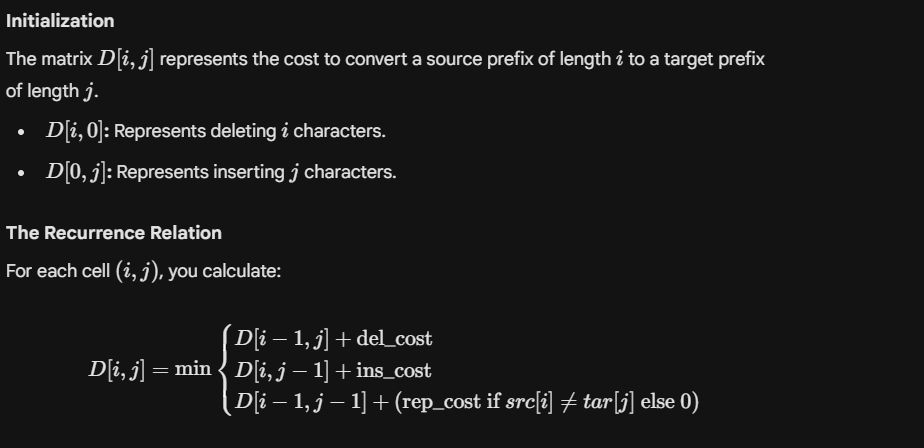

i and j are indice pointing to chars in the given string's s1 and s2
we are trying to convert s1-->s2 in min distance or cost
s1 --> _ _ _ _ _ _ i
s2 --> _ _ _ _ _ _ _ _ _ _ j
so we are comparing chars at these 2 indices
Now think of the 3 operation's we can do 
+ insert char at i so len(s1)++ and now both these new idices i+1 and j will have mathced we move to our next iteration i+1 - 1 and j-1 i.e (i , j-1)
+ delete char at i as chars at i and j were not mathcing so len(s1)-- and new idices i-1 and j which is our next iteration (i-1 , j)
+ replace char at i so we bring new character at this idx i so that i and j match now if both match we move to next position (i-1 , j-1) in both strings

Now each of these possible changes will have a cost assigned to them so using the dynamic programming we will find the min cost to transform this into s1 to s2 and in_case if there is a tie in min cost

IF INTERESTED IN SOLVING THIS MIN EDIT DISTANCE QUESTION THERE IS A DEDICATED CP QUESTION FOR THIS 
https://cses.fi/problemset/task/1639

In [117]:
def min_edit_distance(source, target, ins_cost = 1, del_cost = 1, rep_cost = 2):

    # use deletion and insert cost as  1
    m = len(source) 
    n = len(target)
    #initialize cost matrix with zeros and dimensions (m+1,n+1) 
    dp = np.zeros((m+1, n+1), dtype=int)
    #base cases-->
    for i in range(1, m + 1):
        dp[i, 0] = dp[i-1, 0] + del_cost
        
    for j in range(1, n + 1):
        dp[0, j] = dp[0, j-1] + ins_cost
        
    for i in range(1,m+1):
        for j in range(1,n+1):
            if source[i-1] == target[j-1]: #fixed indexing for char acess
                dp[i,j] = dp[i-1 , j-1]
            else:
                dp[i,j] = min( [ dp[i , j-1] +ins_cost , dp[i-1 , j] + del_cost , dp[i-1 ,j-1] + rep_cost ] )
                
    ans = dp[m , n]
    
    return dp , ans

In [119]:
source =  'orgasm'
target = 'bald'
matrix, min_edits = min_edit_distance(source, target)
print("minimum edits: \n",min_edits, "\n")
idx = list('#' + source)
cols = list('#' + target)
df = pd.DataFrame(matrix, index=idx, columns= cols)
print(df)

minimum edits: 
 8 

   #  b  a  l  d
#  0  1  2  3  4
o  1  2  3  4  5
r  2  3  4  5  6
g  3  4  5  6  7
a  4  5  4  5  6
s  5  6  5  6  7
m  6  7  6  7  8


Now running this on our code for the auto-correct one

In [120]:
source = "eer"
targets = edit_two_letters(source,allow_switches = False) #disable switches since min_edit_distance does not include them
for t in targets:
    _, min_edits = min_edit_distance(source, t,1,1,1)  # set ins, del, sub costs all to one
    if min_edits != 2 and min_edits != 1: print(source, t, min_edits)

eer eer 0


To test your autocorrect system, you need to tie everything together in a single "pipeline." This involves taking a misspelled word, generating candidates, and picking the one with the highest probability from your Shakespearean vocabulary.

Here is the most effective way to test your implementation:

1. The Core Testing Pipeline
You can create a simple loop to test multiple words and see the top suggestions alongside their probability scores.

Python

In [121]:
test_words = ['dys', 'wird', 'thee', 'plan', 'at']

for word in test_words:
    # 2. Get the n-best corrections from your implemented function
    # This uses your edit functions and probability dictionary (probs)
    corrections = get_corrections(word, probs, vocab, n=2)
    
    print(f"-- Testing word: '{word}' --")
    for i, word_prob in enumerate(corrections):
        print(f"Suggestion {i}: {word_prob[0]}, Probability: {word_prob[1]:.6f}")
    print("-" * 30)

-- Testing word: 'dys' --
Suggestion 0: days, Probability: 0.000410
Suggestion 1: dye, Probability: 0.000019
------------------------------
-- Testing word: 'wird' --
Suggestion 0: wiry, Probability: 0.000019
Suggestion 1: word, Probability: 0.000392
Suggestion 2: bird, Probability: 0.000019
Suggestion 3: wild, Probability: 0.000056
Suggestion 4: ward, Probability: 0.000037
Suggestion 5: wind, Probability: 0.000112
------------------------------
-- Testing word: 'thee' --
Suggestion 0: thee, Probability: 0.004476
------------------------------
-- Testing word: 'plan' --
Suggestion 0: play, Probability: 0.000280
Suggestion 1: plant, Probability: 0.000019
Suggestion 2: plain, Probability: 0.000075
------------------------------
-- Testing word: 'at' --
Suggestion 0: at, Probability: 0.002443
------------------------------


Explaining the pipeline

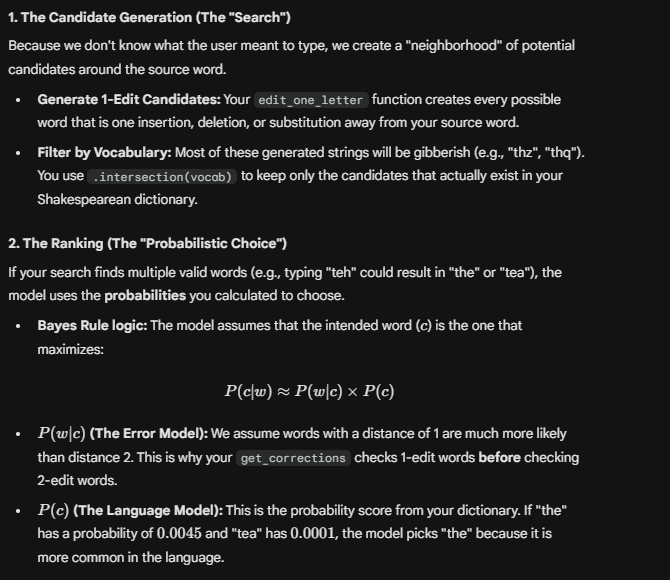

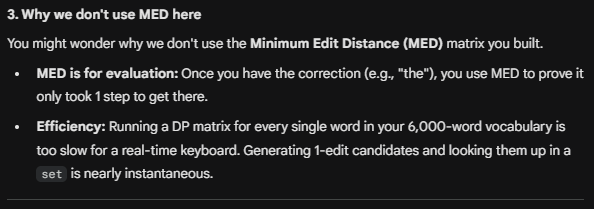

Note this system is just checking your spelling based on the vocab it has it has no relation to context od the sentence and has not idea about the semantics of the statement